In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
num_data = {
    'netifier': 7773,
    'dat': 500,
    'hsd': 13169,
    'casa': 1080,
    'hoasa': 2854,
}

In [46]:
def average_results(results):
    return pd.concat(results).groupby(level=0).mean()

def plot_results(dataset, result):
    data_used = [round(x / num_data[dataset] * 100, 0) for x in result['lc']['Data Used']]
    # metrics = ['F1 Micro']
    metric = 'F1 Micro'
    # fig, axes = plt.subplots(len(metrics), 1, figsize=(15, 10), sharex=True)
    plt.figure(figsize=(15, 10))

    # for idx, key in enumerate(metrics):
    #     ax = axes[idx]
    for method in result.keys():
        if method != 'passive':
            plt.plot(data_used, result[method][metric], label=method.upper(), marker='o')
        else:
            plt.plot(data_used, result[method][metric], label=method.upper(), linestyle='--', color='black')
#     ax.set_title(key)
#     ax.set_ylabel(key)
#     ax.legend()
#     ax.grid(True, axis='x')
    plt.title(metric)
    plt.xlabel("Data Used (%)")
    plt.ylabel(metric)
    plt.legend(fontsize='x-large')
    plt.grid(True, axis='x')

    # axes[-1].set_xlabel('Data Used (%)')
    plt.xticks(data_used)
    plt.tight_layout()
    plt.savefig(f'./{dataset}.jpg', format='jpg')
    plt.show()

In [47]:
def load_result(dataset, ignored_method=None):
    methods = ['lc', 'mc', 'kmeans', 'coreset', 'comal', 'besra', 'random']
    result = {}

    if ignored_method is not None:
        for method in ignored_method:
            methods.remove(method)
    
    for method in methods:
        for i in range (1, 6):
            if i == 1:
                result[method] = [pd.read_csv(f"../{dataset}/metrics/{dataset}-{method}-{i}-results.csv")]
            else:
                result[method].append(pd.read_csv(f"../{dataset}/metrics/{dataset}-{method}-{i}-results.csv"))

    for method in methods:
        result[method] = average_results(result[method])
    
    passive_result = pd.read_csv(f"../{dataset}/metrics/{dataset}-passive-results.csv")
    result['passive'] = pd.DataFrame({
        'Accuracy': [np.mean(passive_result['Accuracy']) for i in range(len(result['lc']))],
        'F1 Micro': [np.mean(passive_result['F1 Micro']) for i in range(len(result['lc']))],
        'F1 Macro': [np.mean(passive_result['F1 Macro']) for i in range(len(result['lc']))],
    })

    return result

# NETIFIER

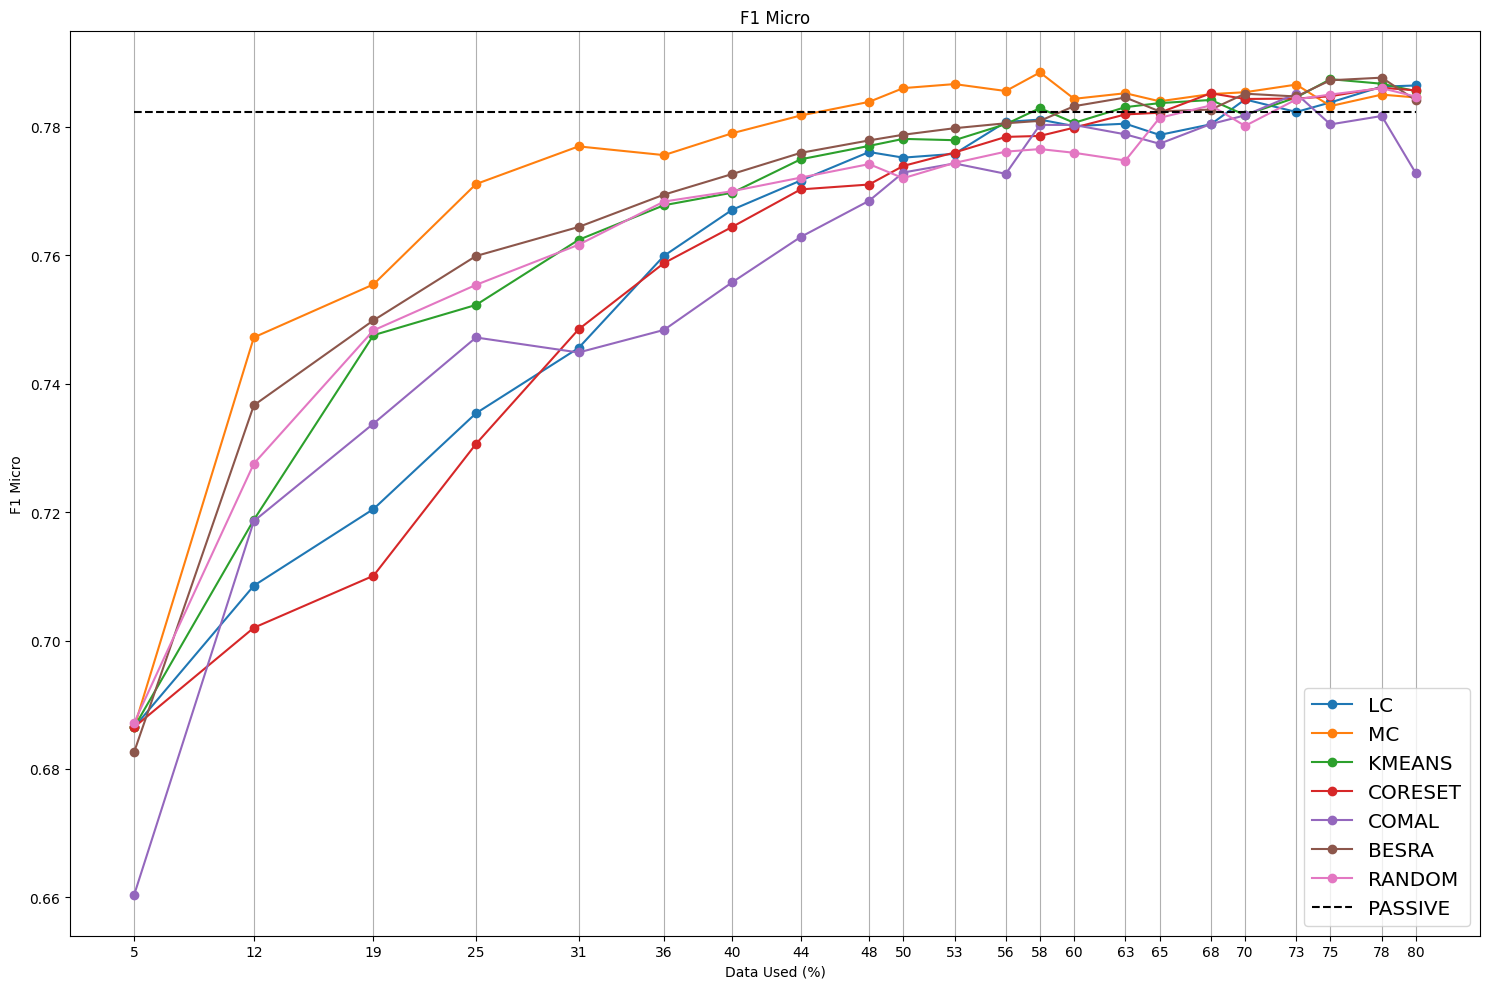

In [48]:
result = load_result('netifier')
plot_results('netifier', result)

# DOCTOR'S ANSWER TEXT

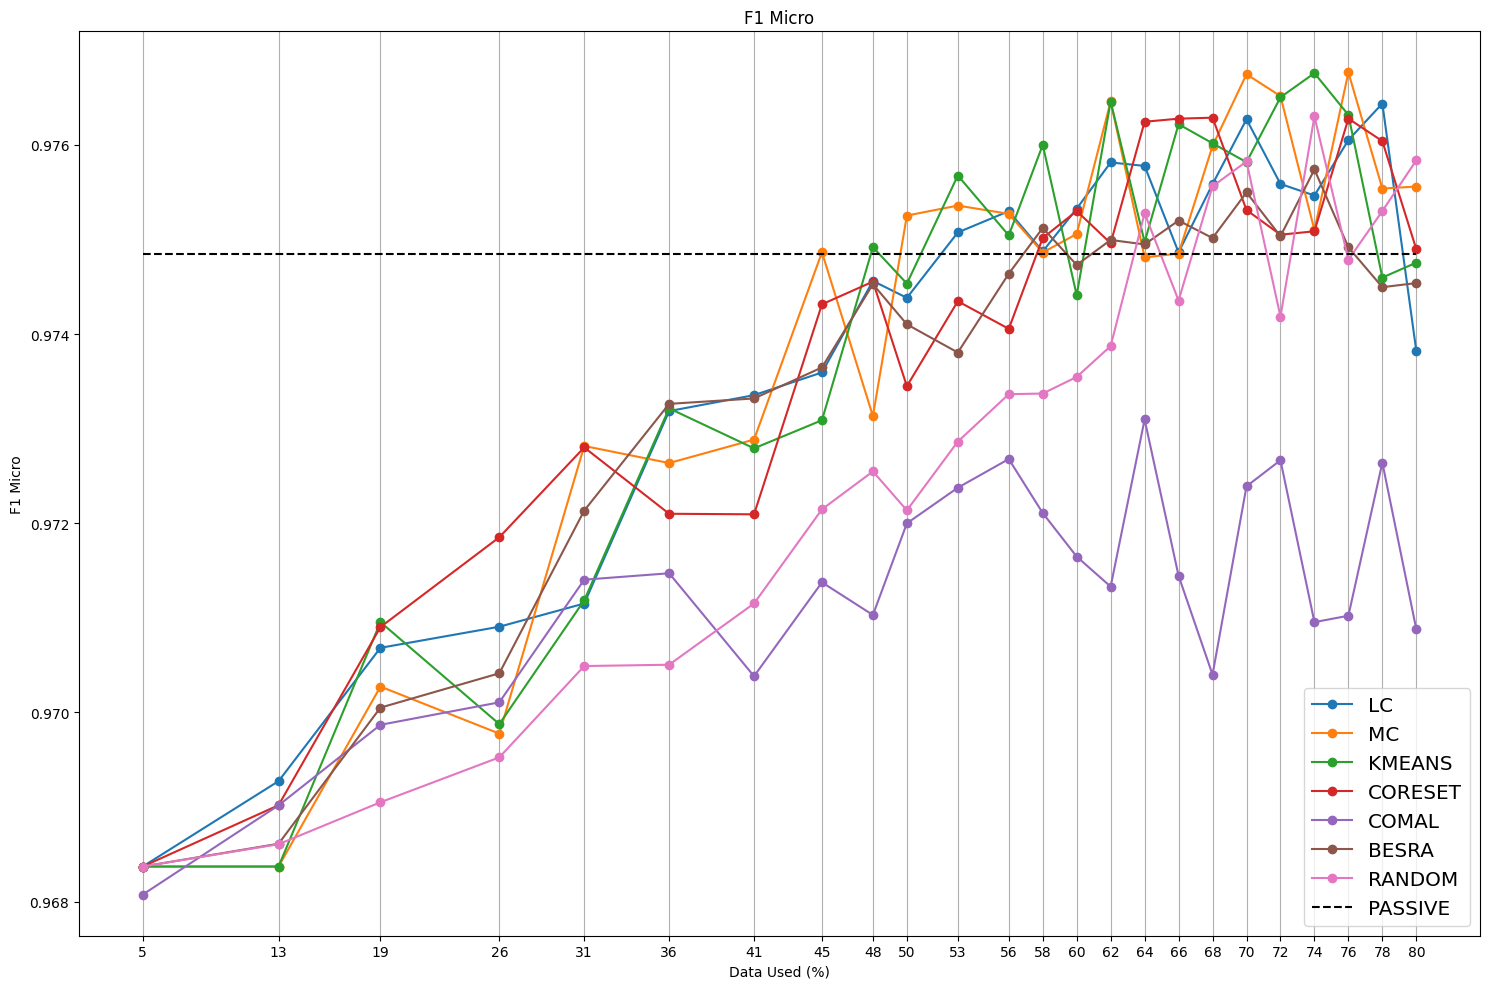

In [49]:
result = load_result('dat')
plot_results('dat', result)

# HATE SPEECH DETECTION

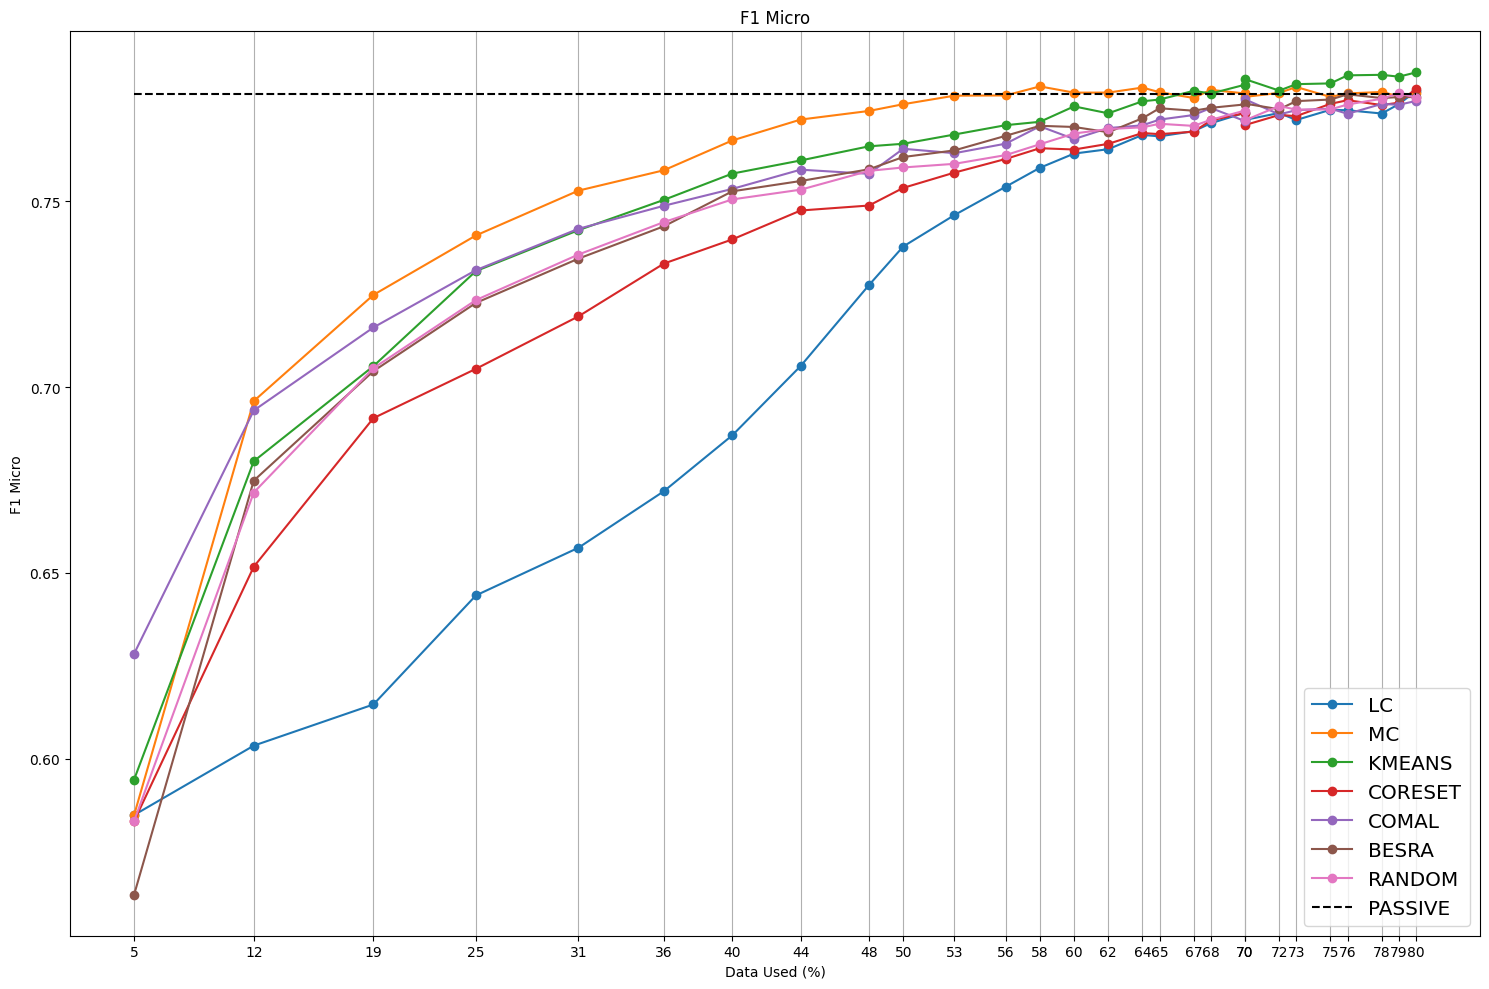

In [50]:
result = load_result('hsd')
plot_results('hsd', result)

# CASA

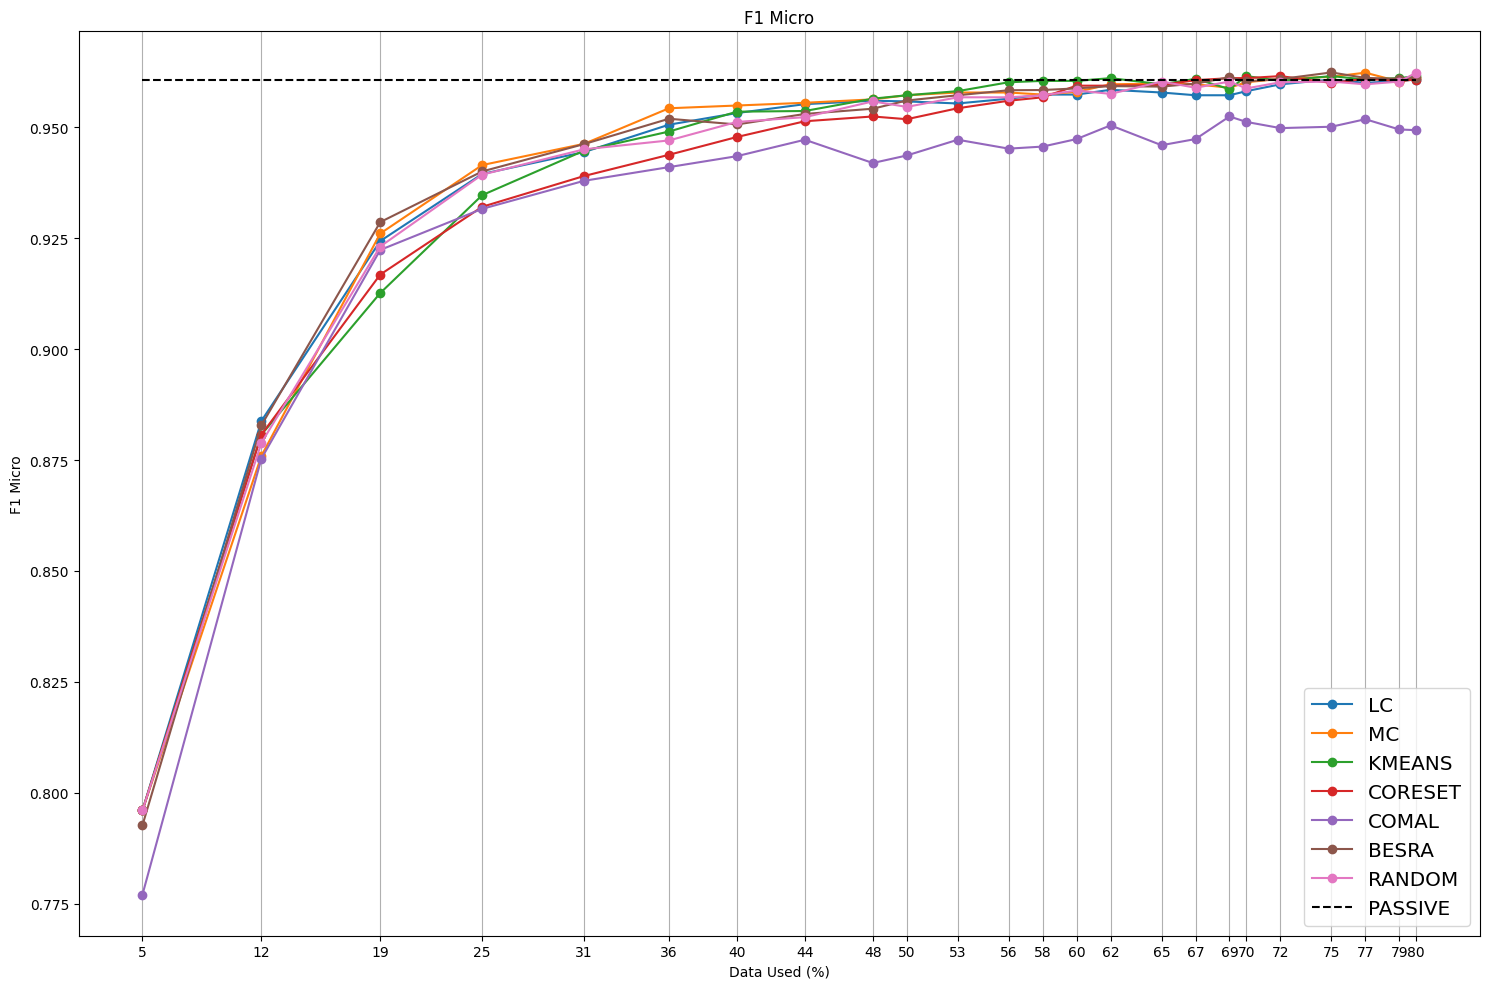

In [51]:
result = load_result('casa')
plot_results('casa', result)

# HOASA

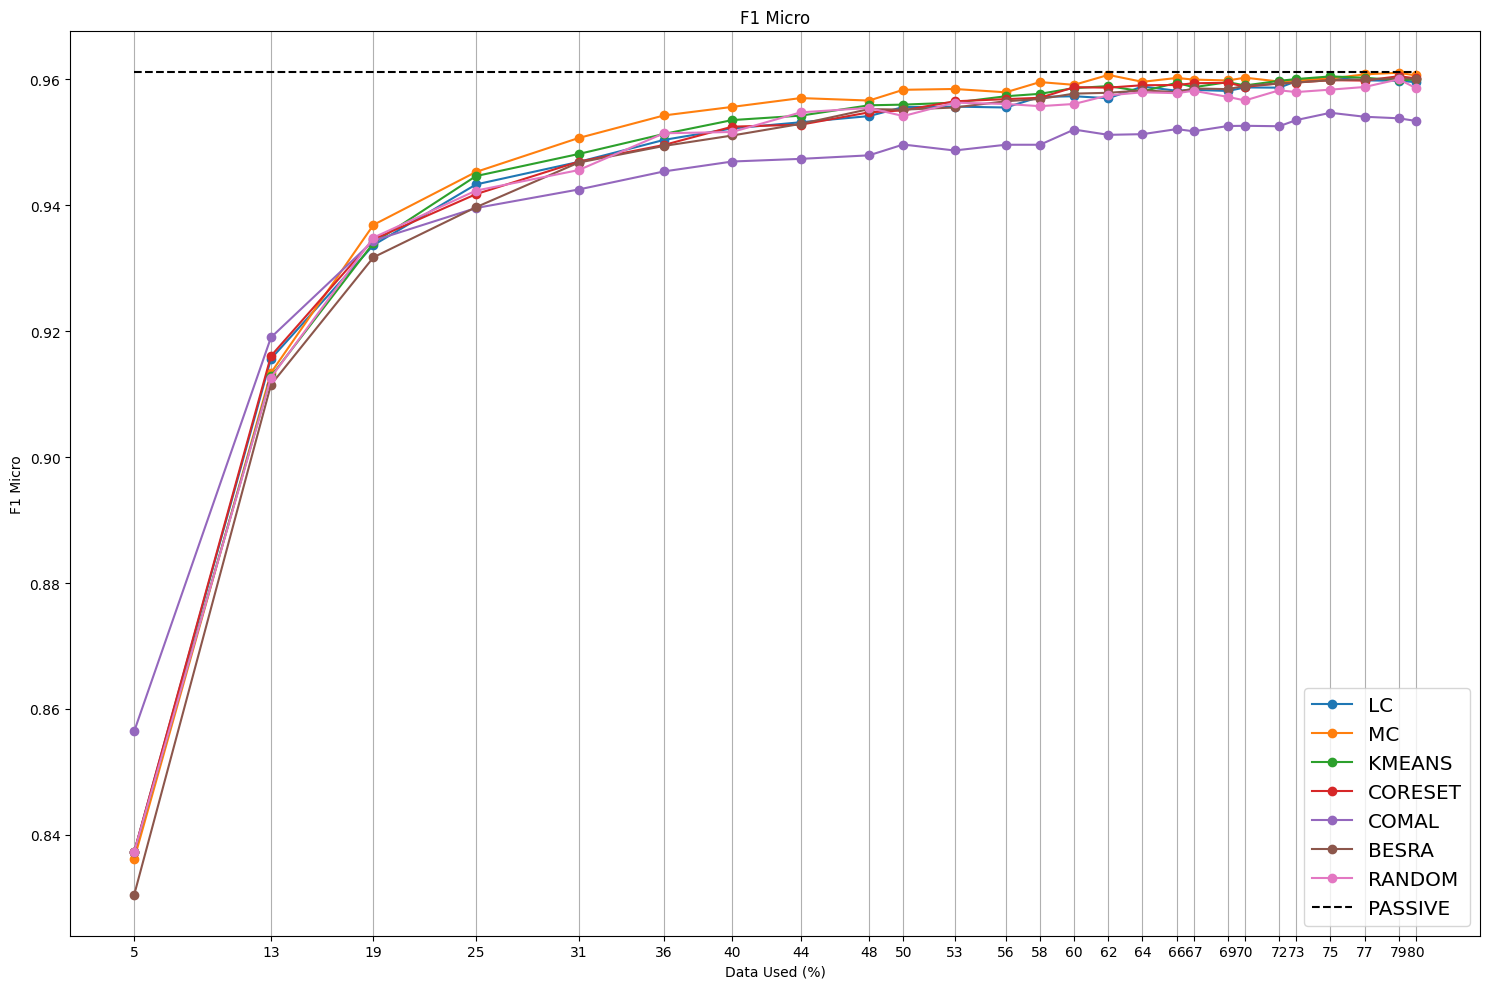

In [52]:
result = load_result('hoasa')
plot_results('hoasa', result)